In [1]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, f1_score, plot_confusion_matrix, accuracy_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('my_dataframe.csv')
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df['Weeks.on.chart'] = df['Weeks.on.chart'].fillna(0)

In [4]:
df['Peak.position'] = df['Weeks.on.chart'].fillna(df['Weekly.rank'])

# EDA

### Audio Features

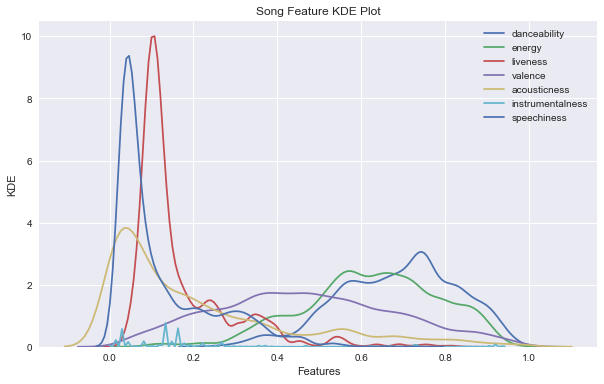

In [5]:
fig, ax = plt.subplots(figsize=[10,6])
ax.set_xlabel('Features')
ax.set_ylabel('KDE')
sns.kdeplot(df['danceability'])
sns.kdeplot(df['energy'])
sns.kdeplot(df['liveness'])
sns.kdeplot(df['valence'])
sns.kdeplot(df['acousticness'])
sns.kdeplot(df['instrumentalness'])
sns.kdeplot(df['speechiness'])
plt.title('Song Feature KDE Plot')

fig.savefig('audio_features.png')

plt.show();

In [6]:
audio_df = df[['Weekly.rank','danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
audio_df.corr()

,Weekly.rank,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Weekly.rank,1.000000,-0.184819,0.072266,-0.003886,-0.012191,-0.009541,-0.013340,0.048090,0.028500,0.024796,0.032982,0.069533,0.007246,-0.022701
danceability,-0.184819,1.000000,-0.054431,-0.045347,-0.013078,-0.159292,0.354922,-0.235260,-0.032057,0.032858,0.180359,-0.022351,-0.174365,0.146580
energy,0.072266,-0.054431,1.000000,0.038048,0.719461,-0.024074,-0.049442,-0.517496,-0.096729,0.078162,0.389917,0.124526,0.002750,0.091299
key,-0.003886,-0.045347,0.038048,1.000000,-0.026506,-0.122396,0.033413,-0.002165,-0.010423,-0.134258,0.038316,-0.111613,-0.028497,-0.011958
loudness,-0.012191,-0.013078,0.719461,-0.026506,1.000000,-0.036716,-0.163389,-0.398422,-0.240373,-0.002618,0.266795,0.107930,-0.011831,0.024309
mode,-0.009541,-0.159292,-0.024074,-0.122396,-0.036716,1.000000,-0.204676,0.073585,0.007393,-0.056804,0.036560,0.043151,0.093005,-0.023650
speechiness,-0.013340,0.354922,-0.049442,0.033413,-0.163389,-0.204676,1.000000,-0.143136,0.000912,0.067027,-0.033853,0.147742,-0.133180,0.048570
acousticness,0.048090,-0.235260,-0.517496,-0.002165,-0.398422,0.073585,-0.143136,1.000000,0.097711,-0.155233,-0.117559,-0.130618,-0.032836,-0.037640
instrumentalness,0.028500,-0.032057,-0.096729,-0.010423,-0.240373,0.007393,0.000912,0.097711,1.000000,-0.005873,-0.045162,0.032308,-0.048835,-0.001904
liveness,0.024796,0.032858,0.078162,-0.134258,-0.002618,-0.056804,0.067027,-0.155233,-0.005873,1.000000,0.009463,-0.012398,-0.007693,-0.018119


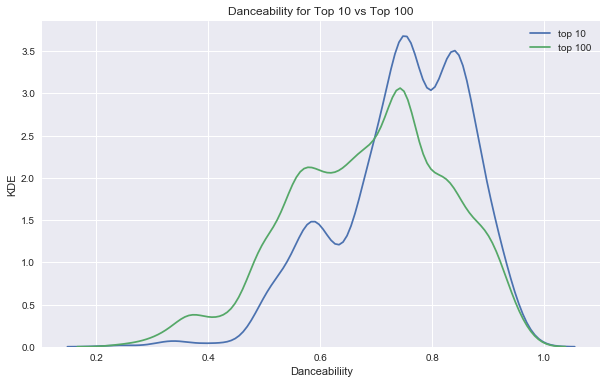

In [7]:
# comparing danceability between top 10 songs and top 100
top_ten = df[df['Weekly.rank']<=10]


fig, ax = plt.subplots(figsize=[10,6])
ax.set_xlabel('Danceabiliity')
ax.set_ylabel('KDE')
sns.kdeplot(top_ten['danceability'], label = 'top 10')
sns.kdeplot(df['danceability'], label = 'top 100')
plt.title('Danceability for Top 10 vs Top 100')

fig.savefig('danceability.png')

plt.show();

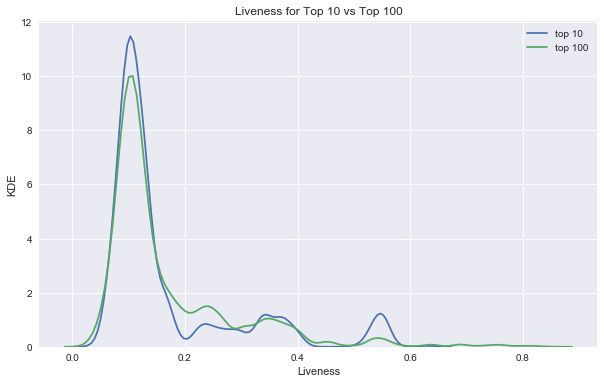

In [8]:
# comparing liveness of songs in the top 10 vs top 100 
fig, ax = plt.subplots(figsize=[10,6])
ax.set_xlabel('Liveness')
ax.set_ylabel('KDE')
sns.kdeplot(top_ten['liveness'], label = 'top 10')
sns.kdeplot(df['liveness'], label = 'top 100')
plt.title('Liveness for Top 10 vs Top 100')

plt.savefig('liveness.png')

plt.show();

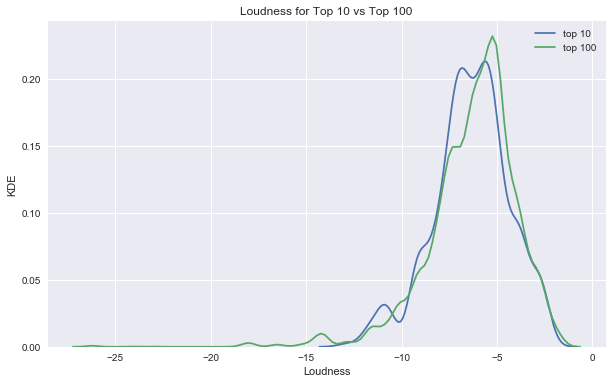

In [9]:
# comparing loudness of songs in the top 10 vs top 100 
fig, ax = plt.subplots(figsize=[10,6])
ax.set_xlabel('Loudness')
ax.set_ylabel('KDE')
sns.kdeplot(top_ten['loudness'], label = 'top 10')
sns.kdeplot(df['loudness'], label = 'top 100')
plt.title('Loudness for Top 10 vs Top 100')

plt.savefig('loudness.png')

plt.show();

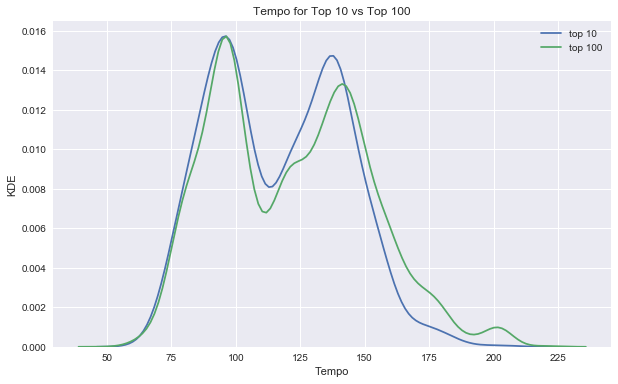

In [10]:
# comparing tempo of songs in the top 10 vs top 100 
fig, ax = plt.subplots(figsize=[10,6])
ax.set_xlabel('Tempo')
ax.set_ylabel('KDE')
sns.kdeplot(top_ten['tempo'], label = 'top 10')
sns.kdeplot(df['tempo'], label = 'top 100')
plt.title('Tempo for Top 10 vs Top 100')

plt.savefig('tempo.png')

plt.show();

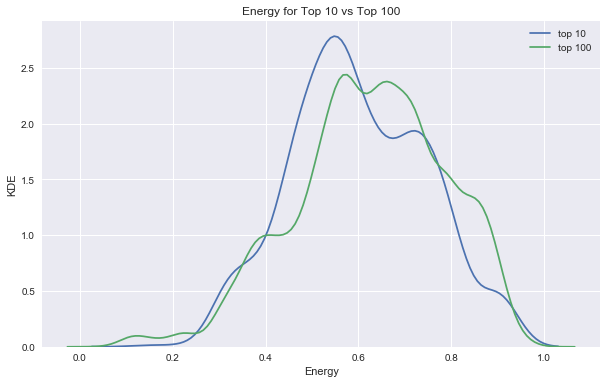

In [11]:
# comparing energy of songs in the top 10 vs top 100 
fig, ax = plt.subplots(figsize=[10,6])
ax.set_xlabel('Energy')
ax.set_ylabel('KDE')
sns.kdeplot(top_ten['energy'], label = 'top 10')
sns.kdeplot(df['energy'], label = 'top 100')
plt.title('Energy for Top 10 vs Top 100')
plt.savefig('energy.png')

plt.show();

### Genres

In [12]:
genres = []
for row in df['Genre']: 
    genres.extend(row.split('|'))
genre_dict = {}
for genre in genres:
    if genre in genre_dict: 
        genre_dict[genre] += 1
    else:
        genre_dict[genre] = 1
# creating df 
genres = {'Genre': list(genre_dict.keys()), 'Count': list(genre_dict.values())}
genre_df = pd.DataFrame(genres)
sorted_genres = genre_df.sort_values(by='Count',ascending=False)

In [13]:
genre_df = sorted_genres[sorted_genres['Count']>78]

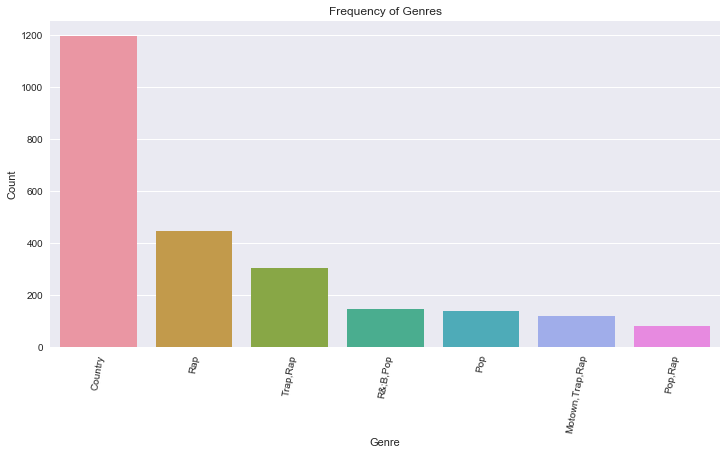

In [14]:
# barplot of genres
x = genre_df['Genre']
y = genre_df['Count']

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x,y)

ax.set_xticklabels(x,rotation=80)
ax.set_ylabel("Count")
ax.set_title("Frequency of Genres");

fig.savefig('genres.png')

# Modeling

## Preprocessing

In [15]:
# creating 'Top_10' column 
df['Top_10']= np.where(df['Weekly.rank']<=10,1,0)

In [16]:
# df with the features I want to use for modeling
df_modeling = df[['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','Top_10']]

selected_features = ['danceability', 'energy', 'loudness', 
        'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','Top_10']

In [17]:
# scaling my continuous variables
ss = StandardScaler()
df_features_scaled = pd.DataFrame(ss.fit_transform(df_modeling[selected_features]), columns=[selected_features])
df_features_scaled.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Top_10
count,7.715000e+03,7.715000e+03,7.715000e+03,7.715000e+03,7.715000e+03,7.715000e+03,7.715000e+03,7.715000e+03,7.715000e+03,7.715000e+03,7.715000e+03
mean,-2.870319e-16,-2.921549e-16,3.288217e-16,2.864706e-16,1.039969e-15,-3.284728e-16,-8.844369e-17,-8.093188e-17,-2.196972e-16,-2.968533e-16,4.420745e-17
std,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00
min,-3.200945e+00,-3.531809e+00,-8.515819e+00,-8.743042e-01,-9.408377e-01,-1.002338e-01,-1.189333e+00,-2.038407e+00,-2.270406e+00,-4.199011e+00,-3.375182e-01
25%,-7.354008e-01,-6.235060e-01,-4.875239e-01,-7.187982e-01,-7.633786e-01,-1.002338e-01,-6.145310e-01,-7.082591e-01,-8.742985e-01,-5.519470e-01,-3.375182e-01
50%,1.078868e-01,5.399986e-02,1.366095e-01,-4.799549e-01,-3.763162e-01,-1.002338e-01,-4.139404e-01,-4.766777e-02,-5.291159e-02,-9.719617e-02,-3.375182e-01
75%,7.439257e-01,6.879962e-01,6.022532e-01,4.814327e-01,4.379712e-01,-1.001595e-01,2.518856e-01,7.120122e-01,7.488476e-01,4.282256e-01,-3.375182e-01
max,1.973125e+00,2.229477e+00,1.984660e+00,5.292666e+00,3.450173e+00,2.274803e+01,5.721772e+00,2.391802e+00,3.325259e+00,1.022772e+01,2.962803e+00


In [18]:
# creating features and target variables
X = df_features_scaled.drop(columns=['Top_10'])
y = df_modeling['Top_10']

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

## Dummy Classifier

In [20]:
dummy_clf = DummyClassifier(strategy='constant', constant=0)
dummy_clf.fit(X_train, y_train)
dummy_train_pred = dummy_clf.predict(X_train)
dummy_pred = dummy_clf.predict(X_test)

print('Training Accuracy: ', accuracy_score(y_train, dummy_train_pred))
print('Testing Accuracy: ',accuracy_score(y_test, dummy_pred))
print('\n\n')
print('Training F1-Score: ', f1_score(y_train, dummy_train_pred))
print('Testing F1-Score: ', f1_score(y_test, dummy_pred))
print('\n\n')
print('Training Recall: ', recall_score(y_train, dummy_train_pred))
print('Testing Recall: ',recall_score(y_test, dummy_pred))

Training Accuracy:  0.8988982501620221
Testing Accuracy:  0.8930654569021387



Training F1-Score:  0.0
Testing F1-Score:  0.0



Training Recall:  0.0
Testing Recall:  0.0


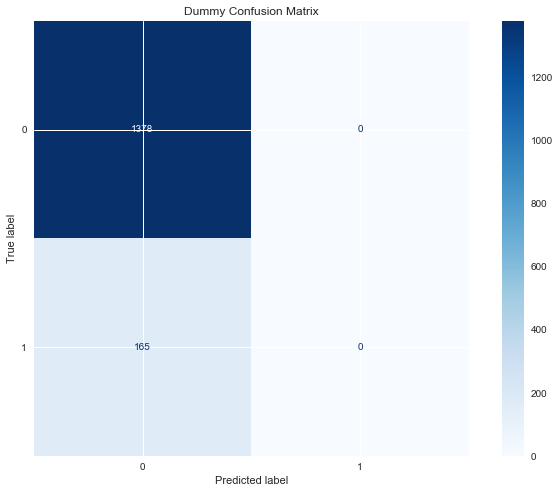

In [21]:
# plot confusion matrix
fig,ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(dummy_clf, X_test, y_test, cmap = 'Blues', values_format='d' , ax= ax)
ax.set_title('Dummy Confusion Matrix')
fig.savefig('Dummy_Confusion_Matrix');

As we can see in the above confusion matrix, everything was classified as not being in the top 100. This is due to the fact that we have a class imbalance. 

## Logistic Regression

In [22]:
df_modeling.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'Top_10'],
      dtype='object')

In [23]:
df_modeling = pd.get_dummies(df_modeling)

In [24]:
df_modeling.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Top_10
danceability,1.000000,-0.054431,-0.013078,0.354922,-0.235260,-0.032057,0.032858,0.180359,-0.022351,-0.174365,0.145199
energy,-0.054431,1.000000,0.719461,-0.049442,-0.517496,-0.096729,0.078162,0.389917,0.124526,0.002750,-0.052682
loudness,-0.013078,0.719461,1.000000,-0.163389,-0.398422,-0.240373,-0.002618,0.266795,0.107930,-0.011831,-0.011182
speechiness,0.354922,-0.049442,-0.163389,1.000000,-0.143136,0.000912,0.067027,-0.033853,0.147742,-0.133180,0.016371
acousticness,-0.235260,-0.517496,-0.398422,-0.143136,1.000000,0.097711,-0.155233,-0.117559,-0.130618,-0.032836,-0.004955
instrumentalness,-0.032057,-0.096729,-0.240373,0.000912,0.097711,1.000000,-0.005873,-0.045162,0.032308,-0.048835,-0.008050
liveness,0.032858,0.078162,-0.002618,0.067027,-0.155233,-0.005873,1.000000,0.009463,-0.012398,-0.007693,-0.003087
valence,0.180359,0.389917,0.266795,-0.033853,-0.117559,-0.045162,0.009463,1.000000,-0.013983,-0.185961,0.024386
tempo,-0.022351,0.124526,0.107930,0.147742,-0.130618,0.032308,-0.012398,-0.013983,1.000000,0.052899,-0.057888
duration_ms,-0.174365,0.002750,-0.011831,-0.133180,-0.032836,-0.048835,-0.007693,-0.185961,0.052899,1.000000,0.021423


In [25]:
target = df_modeling['Top_10']
df_features = df_features_scaled.drop(['Top_10'], axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=25,test_size=0.30)

In [27]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_preds = log.predict(X_test)

log_f1 = metrics.f1_score(y_test, log_preds)
log_acc = metrics.accuracy_score(y_test, log_preds)

print(classification_report(y_test, log_preds, target_names=['Top 100','Top 10']))

              precision    recall  f1-score   support

     Top 100       0.90      1.00      0.95      2088
      Top 10       0.00      0.00      0.00       227

    accuracy                           0.90      2315
   macro avg       0.45      0.50      0.47      2315
weighted avg       0.81      0.90      0.86      2315



This is also showing us that we have class imbalance because it is very skewed towards our top 100 class. 

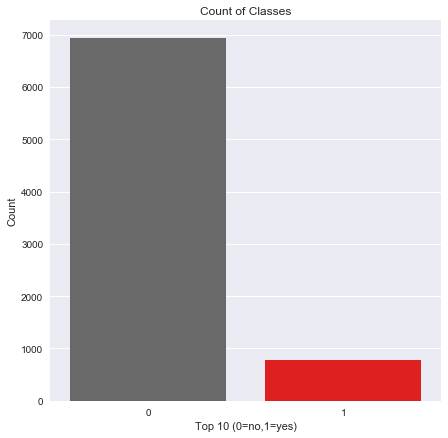

In [28]:
# visualizing this class imbalance

# Create an array with the colors you want to use
colors = ["dimgrey", "red"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(x='Top_10', data=df_modeling, palette=customPalette)

ax.set_title('Count of Classes')
ax.set(xlabel='Top 10 (0=no,1=yes)',ylabel='Count')
fig.savefig('class_imbalance.png')
plt.show();

##### Dealing with class imbalance

In [29]:
# smote
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Synthetic sample class distribution: 

1    4838
0    4838
Name: Top_10, dtype: int64


In [30]:
log = LogisticRegression()
log.fit(X_train_resampled, y_train_resampled)
log_preds = log.predict(X_test)

log_f1 = metrics.f1_score(y_test, log_preds)
log_acc = metrics.accuracy_score(y_test, log_preds)

print(classification_report(y_test, log_preds, target_names=['Top 100','Top 10']))

              precision    recall  f1-score   support

     Top 100       0.95      0.60      0.74      2088
      Top 10       0.17      0.73      0.27       227

    accuracy                           0.61      2315
   macro avg       0.56      0.66      0.50      2315
weighted avg       0.88      0.61      0.69      2315



In [31]:
# class weight balanced
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight = 'balanced')
lr_clf_weighted.fit(X_train, y_train)
y_weighted_train = lr_clf_weighted.predict(X_train)
y_weighted_test = lr_clf_weighted.predict(X_test)

f1_train = metrics.f1_score(y_train, y_weighted_train)
f1_test = metrics.f1_score(y_test, y_weighted_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_weighted_test))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Test Accuracy score:  0.6177105831533477
Train F1 score:  0.27481964960494676
Test F1 score:  0.2618849040867389


In [32]:
coef_names = list(zip(df_features_scaled.columns, lr_clf_weighted.coef_[0]))
coef_names

[(('danceability',), 0.6258440824088911),
 (('energy',), -0.17128768635971245),
 (('loudness',), 0.1338417565146634),
 (('speechiness',), -0.018876154318200816),
 (('acousticness',), 0.09091550151085313),
 (('instrumentalness',), 0.05439483104332916),
 (('liveness',), -0.0010158560690800037),
 (('valence',), 0.055173798535371646),
 (('tempo',), -0.23748941371921764),
 (('duration_ms',), 0.1640815907399994)]

For coefficients our highest correlated coefficients are danceability (0.63), duration (0.16), loudness (0.13), energy (-0.17), and tempo (-0.24). 

In [33]:
# Logistic regression with grid search
logreg = LogisticRegression()
params = {'C': [0.75,1.0,1.25,1.5],
             'max_iter': [100,200,300,400,500],
             'penalty': ['l1', 'l2']}
grid_tree1 = GridSearchCV(logreg, params, cv=5, scoring='f1',verbose =1,n_jobs=-1)

grid_tree1.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.75, 1.0, 1.25, 1.5],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [34]:
#Predict the response for test dataset
y_pred = grid_tree1.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred, target_names=['Top 100','Top 10']))

              precision    recall  f1-score   support

     Top 100       0.95      0.60      0.74      2088
      Top 10       0.17      0.73      0.27       227

    accuracy                           0.61      2315
   macro avg       0.56      0.66      0.50      2315
weighted avg       0.88      0.61      0.69      2315



In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    For normalization set `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1253  835]
 [  62  165]]


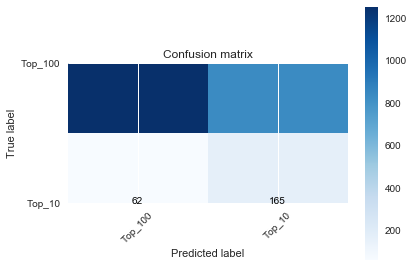

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Top_100','Top_10'],
                      title='Confusion matrix')

**Breakdown of Confusion Matrix**

TN = 1253

TP = 165

FN = 62 

FP = 835

## Random Forest 

In [37]:
rfc = RandomForestClassifier(random_state = 25, n_estimators=20, max_features=6)
rfc.fit(X_train_resampled, y_train_resampled)
rfc_preds = rfc.predict(X_test)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)
rfc_acc = metrics.accuracy_score(y_test, rfc_preds)

# checking accuracy on the test data
print(classification_report(y_test, rfc_preds, target_names=['Top 100','Top 10']))

              precision    recall  f1-score   support

     Top 100       0.98      0.89      0.93      2088
      Top 10       0.46      0.87      0.60       227

    accuracy                           0.89      2315
   macro avg       0.72      0.88      0.77      2315
weighted avg       0.93      0.89      0.90      2315



In [38]:
# Random Forest with GridSearch
param_grid2 = { 
    'n_estimators': [50,100,150,200],
    'max_features': [4,5,6,7,8],
    'criterion' : ['gini','entropy']
    
}

rfc_CV = RandomForestClassifier(random_state = 25)
rfc_CV = GridSearchCV(estimator=rfc_CV, param_grid=param_grid2, cv= 10, scoring='f1', verbose=1, n_jobs=-1)
rfc_CV.fit(X_train_resampled, y_train_resampled)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.9min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=25),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1', verbose=1)

In [39]:
#predict on the test set
test_preds_rfc_CV = rfc_CV.best_estimator_.predict(X_test)

# checking metrics
print(classification_report(y_test, test_preds_rfc_CV, target_names=['Top 100','Top 10']))

              precision    recall  f1-score   support

     Top 100       0.99      0.89      0.93      2088
      Top 10       0.46      0.88      0.60       227

    accuracy                           0.89      2315
   macro avg       0.72      0.88      0.77      2315
weighted avg       0.93      0.89      0.90      2315



Confusion matrix, without normalization
[[1851  237]
 [  28  199]]


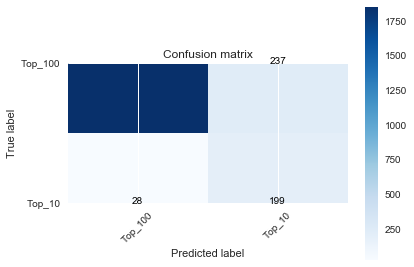

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, test_preds_rfc_CV)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Top_100','Top_10'],
                      title='Confusion matrix')

**Breakdown of Confusion Matrix**

TN = 1851

TP = 199

FN = 28

FP = 237

In [41]:
rf_coef = list(zip(df_features.columns, rfc.feature_importances_))
rf_coef = sorted(rf_coef, key=lambda x: abs(x[1]), reverse = True)

In [42]:
# feature importance
rf_coef

[(('danceability',), 0.16355023499958204),
 (('duration_ms',), 0.14035283352687652),
 (('tempo',), 0.13576649851990719),
 (('valence',), 0.13363338814537506),
 (('energy',), 0.11715516710414789),
 (('acousticness',), 0.07504568023719047),
 (('speechiness',), 0.07221160329485937),
 (('loudness',), 0.06809183986947406),
 (('liveness',), 0.06419872962886852),
 (('instrumentalness',), 0.02999402467371891)]

Danceability, energy, tempo and valence are the most important features for this model.